<a href="https://colab.research.google.com/github/Bhukya-Anil/Sentiment_Analysis/blob/master/Mid_Proj_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import string
import re
import emoji
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
df1=pd.read_csv('/content/d_tweets.csv')
df1['Sentiment'] = 1;
df1.rename(columns={'tweet': 'Tweet'}, inplace=True)
df1 = df1[['Tweet', 'Sentiment']]
df1.head()

,Tweet,Sentiment
0,the real reason why you're sad? you're attache...,1
1,my biggest problem is overthinking everything,1
2,the worst sadness is the sadness you've taught...,1
3,i cannot make you understand. i cannot make an...,1
4,i don't think anyone really understands how ti...,1


In [ ]:
df2=pd.read_csv('/content/non_d_tweets.csv')
df2['Sentiment'] = 0;
df2.rename(columns={'tweet': 'Tweet'}, inplace=True)
df2 = df2[['Tweet', 'Sentiment']]
df2.head()

,Tweet,Sentiment
0,Touch Passes are the new ASMR,0
1,"12 years ago, I called my dad and he gave me s...",0
2,"There are 6,500 languages yet I choose to only...",0
3,"Hey everyone, ask for a raise today. I’m tell...",0
4,I invested in 47 startups in a year. Here's ho...,0


In [ ]:
df3 = pd.concat([df1,df2])
df3['Sentiment'].value_counts()

,count
Sentiment,
0,4809
1,3496


In [ ]:
df4=pd.read_csv('/content/sentiment_tweets3.csv')
df4.rename(columns={'message to examine': 'Tweet','label (depression result)':'Sentiment'}, inplace=True)
df4 = df4[df4['Sentiment'] == 1]
df4 = df4[['Tweet', 'Sentiment']]
df4.head()

,Tweet,Sentiment
8000,The lack of this understanding is a small but ...,1
8001,i just told my parents about my depression and...,1
8002,depression is something i don't speak about ev...,1
8003,Made myself a tortilla filled with pb&j. My de...,1
8004,@WorldofOutlaws I am gonna need depression med...,1


In [ ]:
df4['Sentiment'].value_counts()

,count
Sentiment,
1,2314


In [ ]:
df5 = pd.concat([df3,df4])
df5['Sentiment'].value_counts()

,count
Sentiment,
1,5810
0,4809


In [ ]:
df6=pd.read_csv('/content/Mental-Health-Twitter.csv')
df6 = df6[['post_text', 'label']]
df6.rename(columns={'post_text': 'Tweet', 'label': 'Sentiment'}, inplace=True)
df6.head()

,Tweet,Sentiment
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1


In [ ]:
df = pd.concat([df5,df6])
df['Sentiment'].value_counts()

,count
Sentiment,
1,15810
0,14809


In [ ]:
df.isnull().sum()

,0
Tweet,0
Sentiment,0


In [ ]:
df.sample(n=10, random_state=42)

,Tweet,Sentiment
18117,Hey AionHill thanks for the follow!,0
14363,Nobody knows how it might end up,0
9972,More than 1 in 20 US children and teens have a...,1
896,"Girls, they can be your best friend, worst ene...",1
7520,@TheSilentG The hashtag of course!,1
8561,depression is the worst feeling in the world..,1
4468,I'm a huge fan of John @mulaney and his wondro...,0
2919,RT @mnwild: #mnwild takes the 3-2 lead into th...,1
3072,RT @mnwild: Koivu scores a PPG. #mnwild cuts t...,1
18699,K Padma Rani is now following me on Twitter! T...,0


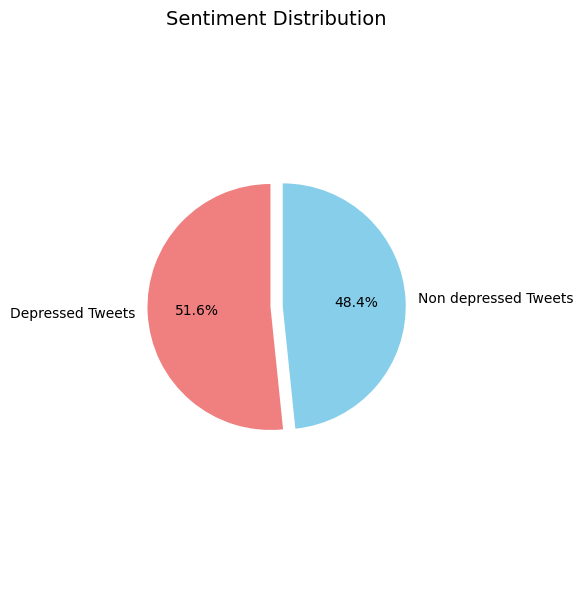

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=['Depressed Tweets', 'Non depressed Tweets'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90, explode=(0.1, 0))

plt.title('Sentiment Distribution', fontsize=14)

plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def text_transformation(text):
    if isinstance(text, str):
        text = text.lower()
        text = emoji.demojize(text)
        text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])
        text = re.sub('\[.*?\]', '', text)
        text = re.sub("\\W"," ",text)
        text = re.sub('https?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\n', '', text)
        text = re.sub('\w*\d\w*', '', text)
        text = re.sub(' +', ' ', text)
    return text

df["Tweet"] = df["Tweet"].apply(text_transformation)

In [ ]:
generalized_stopwords = [
    'i','me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', 'your', 'yours', 'yourself', 'yourselves','go',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those',
    'a', 'an', 'at','the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
    'from', 'up', 'down', 'in', 'out', 'im','on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
    'such','only', 'own', 'same', 'so', 'than', 'too','https','twitter','tweet','t','co','s'
]

In [ ]:
df["Tweet"] = df["Tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in generalized_stopwords))

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)
df["Tweet"] = df["Tweet"].apply(lemmatize_text)

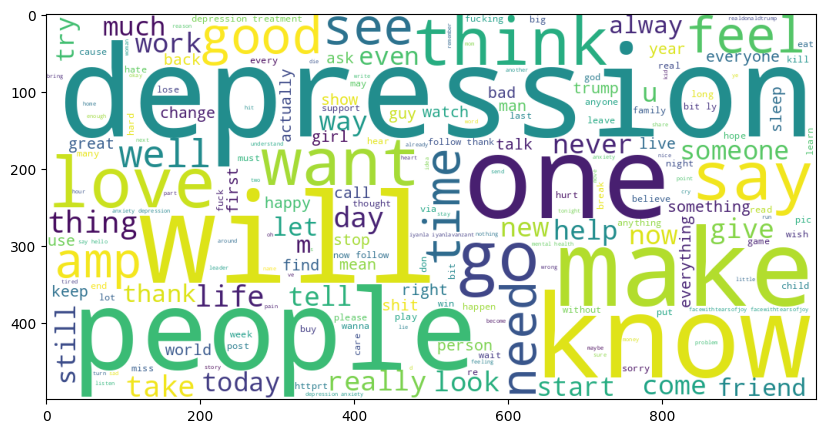

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

word_cloud = ""
for row in df['Tweet']:
    for word in row:
        word_cloud += " ".join(word)

wordcloud = WordCloud(width=1000, height=500, background_color='white', min_font_size=6).generate(word_cloud)
fig, ax = plt.subplots(figsize=(10, 5))
rect = Rectangle((0.1, 0.1), 0.5, 0.3, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.imshow(wordcloud)
plt.show()

In [ ]:
def performance_eval(clf, X_test, y_test):
    y_predict = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print(f'Accuracy: {accuracy:.5f}\n')
    print('---------------------------- Classification Report ---------------------------------\n')
    print(classification_report(y_test, y_predict))
    print('\n')
    print('------------------------------- Confusion Matrix ----------------------------------- ')
    cm = confusion_matrix(y_test, y_predict)
    sns.set(rc={'figure.figsize':(8,6)})
    heatmap = sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
                          xticklabels=['Negative', 'Positive'],
                          yticklabels=['Negative', 'Positive'])
    plt.text(0.5, 0.4, 'True Negative', ha='center', va='center', color='white')
    plt.text(0.5, 1.4, 'False Positive', ha='center', va='center')
    plt.text(1.5, 0.4, 'False Negative', ha='center', va='center')
    plt.text(1.5, 1.4, 'True Positive', ha='center', va='center', color='white')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')

    plt.show()

Shape of X_train: (24495, 24852)
Shape of X_test: (6124, 24852)


Decision Tree (BOW)

Accuracy: 0.78054

---------------------------- Classification Report ---------------------------------

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2962
           1       0.78      0.79      0.79      3162

    accuracy                           0.78      6124
   macro avg       0.78      0.78      0.78      6124
weighted avg       0.78      0.78      0.78      6124



------------------------------- Confusion Matrix ----------------------------------- 


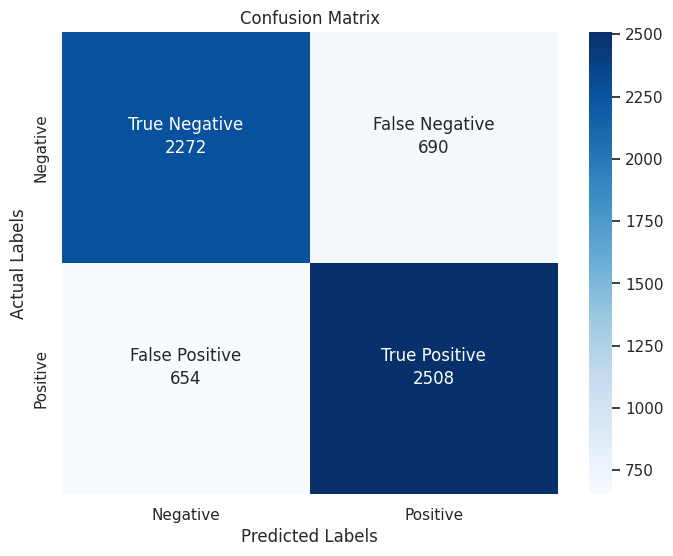

In [ ]:
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)
dt_classifier = DecisionTreeClassifier(splitter='random')
dt_classifier.fit(X_train, y_train)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\n")
print("Decision Tree (BOW)\n")
performance_eval(dt_classifier,X_test,y_test)

Shape of X_train: (24495, 24852)
Shape of X_test: (6124, 24852)


Decision Tree (TF-IDF)

Accuracy: 0.77482

---------------------------- Classification Report ---------------------------------

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2962
           1       0.78      0.79      0.78      3162

    accuracy                           0.77      6124
   macro avg       0.77      0.77      0.77      6124
weighted avg       0.77      0.77      0.77      6124



------------------------------- Confusion Matrix ----------------------------------- 


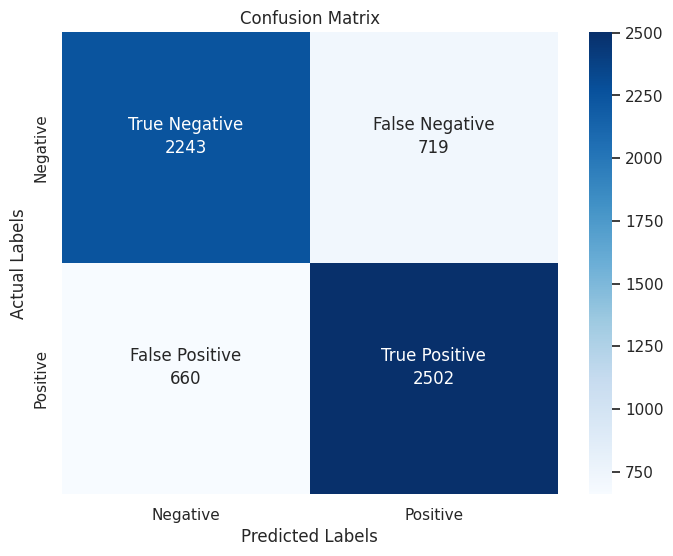

In [ ]:
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("Shape of X_train:", X_train_tfidf.shape)
print("Shape of X_test:", X_test_tfidf.shape)
print("\n")
dt_classifier = DecisionTreeClassifier(splitter='random')
dt_classifier.fit(X_train_tfidf, y_train)
print("Decision Tree (TF-IDF)\n")
performance_eval(dt_classifier,X_test_tfidf,y_test)

Shape of X_train: (24495, 24852)
Shape of X_test: (6124, 24852)


Random Forest (BOW)

Accuracy: 0.81695

---------------------------- Classification Report ---------------------------------

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      2962
           1       0.79      0.88      0.83      3162

    accuracy                           0.82      6124
   macro avg       0.82      0.81      0.82      6124
weighted avg       0.82      0.82      0.82      6124



------------------------------- Confusion Matrix ----------------------------------- 


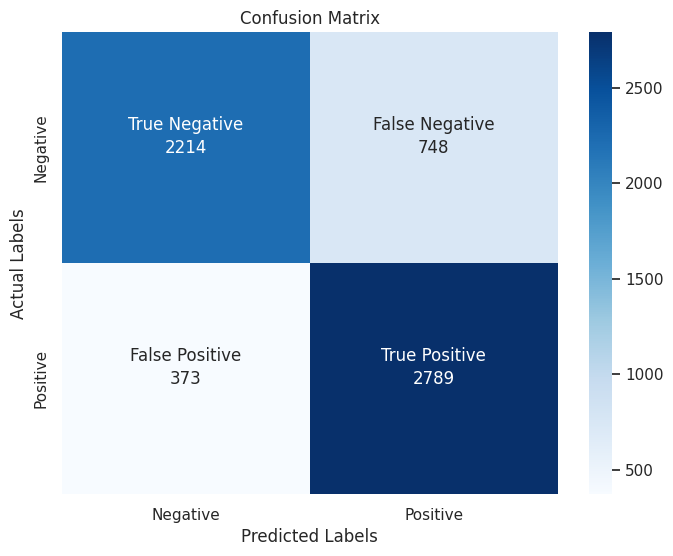

In [ ]:
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\n")
rf_classifier = RandomForestClassifier(n_estimators=150)
rf_classifier.fit(X_train, y_train)
print("Random Forest (BOW)\n")
performance_eval(rf_classifier,X_test,y_test)

Shape of X_train_tfidf: (24495, 24852)
Shape of X_test_tfidf: (6124, 24852)


Random Forest (TF-IDF)

Accuracy: 0.83197

---------------------------- Classification Report ---------------------------------

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      2962
           1       0.83      0.86      0.84      3162

    accuracy                           0.83      6124
   macro avg       0.83      0.83      0.83      6124
weighted avg       0.83      0.83      0.83      6124



------------------------------- Confusion Matrix ----------------------------------- 


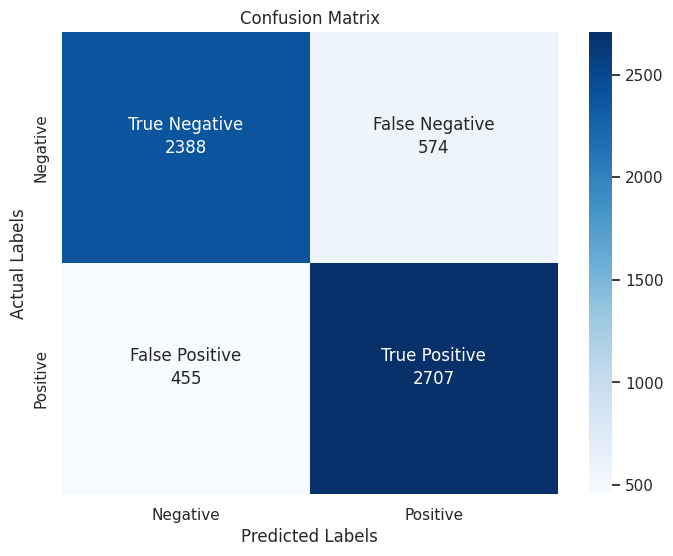

In [ ]:
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)
print("\n")
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
print("Random Forest (TF-IDF)\n")
performance_eval(rf_classifier,X_test_tfidf,y_test)

Shape of X_train: (24495, 24852)
Shape of X_test: (6124, 24852)


Logistic Regression (BOW)

Accuracy: 0.86088

---------------------------- Classification Report ---------------------------------

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2962
           1       0.86      0.87      0.87      3162

    accuracy                           0.86      6124
   macro avg       0.86      0.86      0.86      6124
weighted avg       0.86      0.86      0.86      6124



------------------------------- Confusion Matrix ----------------------------------- 


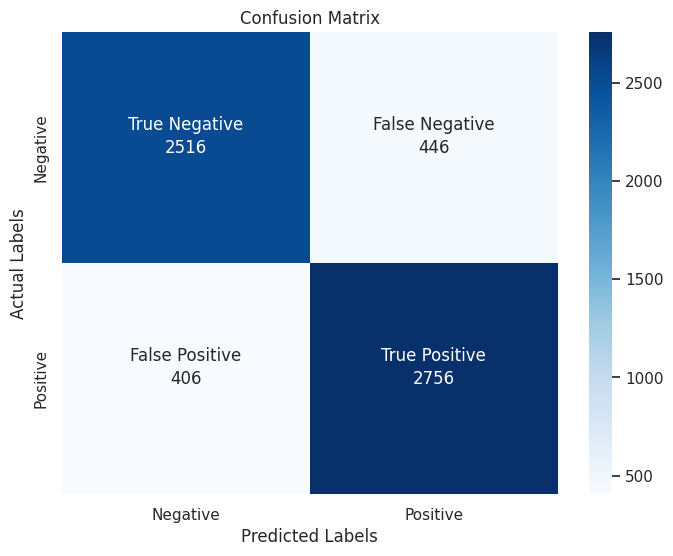

In [ ]:
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\n")
print("Logistic Regression (BOW)\n")
performance_eval(lr,X_test,y_test)

Shape of X_train_tfidf: (24495, 23000)
Shape of X_test_tfidf: (6124, 23000)


Logistic Regression (TF-IDF)

Accuracy: 0.85042

---------------------------- Classification Report ---------------------------------

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2962
           1       0.87      0.83      0.85      3162

    accuracy                           0.85      6124
   macro avg       0.85      0.85      0.85      6124
weighted avg       0.85      0.85      0.85      6124



------------------------------- Confusion Matrix ----------------------------------- 


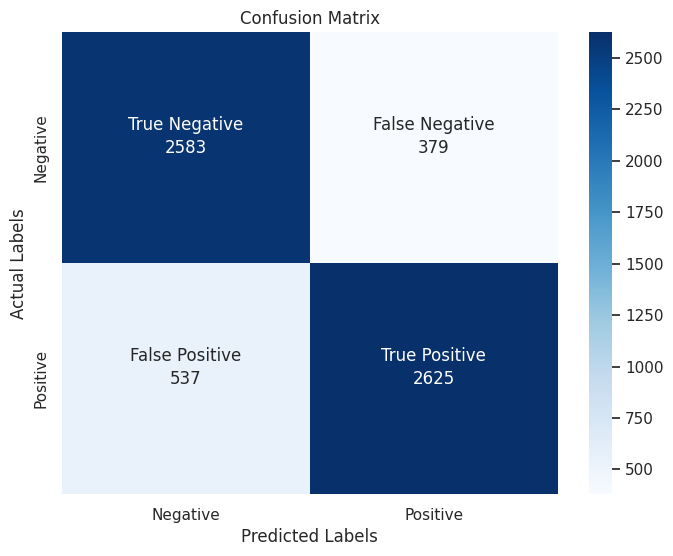

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
tfidf_vectorizer = TfidfVectorizer(max_features=23000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)
print("\n")
print("Logistic Regression (TF-IDF)\n")
performance_eval(lr,X_test_tfidf,y_test)

Shape of X_train: (24495, 23000)
Shape of X_test: (6124, 23000)


Naive Bayes (BOW)

Accuracy: 0.86218

---------------------------- Classification Report ---------------------------------

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2962
           1       0.84      0.90      0.87      3162

    accuracy                           0.86      6124
   macro avg       0.86      0.86      0.86      6124
weighted avg       0.86      0.86      0.86      6124



------------------------------- Confusion Matrix ----------------------------------- 


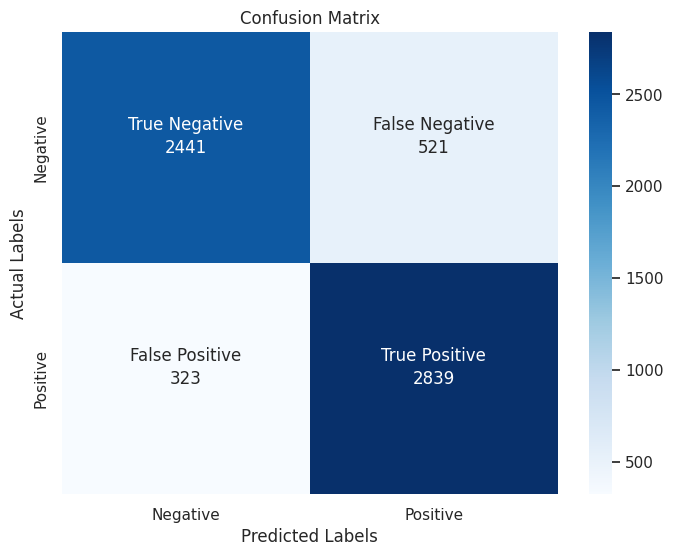

In [ ]:
from sklearn.naive_bayes import MultinomialNB

X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
count_vectorizer = CountVectorizer(max_features=23000)
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\n")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
print("Naive Bayes (BOW)\n")
performance_eval(nb_classifier, X_test, y_test)

Shape of X_train_tfidf: (24495, 22000)
Shape of X_test_tfidf: (6124, 22000)


Naive Bayes (TF-IDF)

Accuracy: 0.85222

---------------------------- Classification Report ---------------------------------

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2962
           1       0.81      0.93      0.87      3162

    accuracy                           0.85      6124
   macro avg       0.86      0.85      0.85      6124
weighted avg       0.86      0.85      0.85      6124



------------------------------- Confusion Matrix ----------------------------------- 


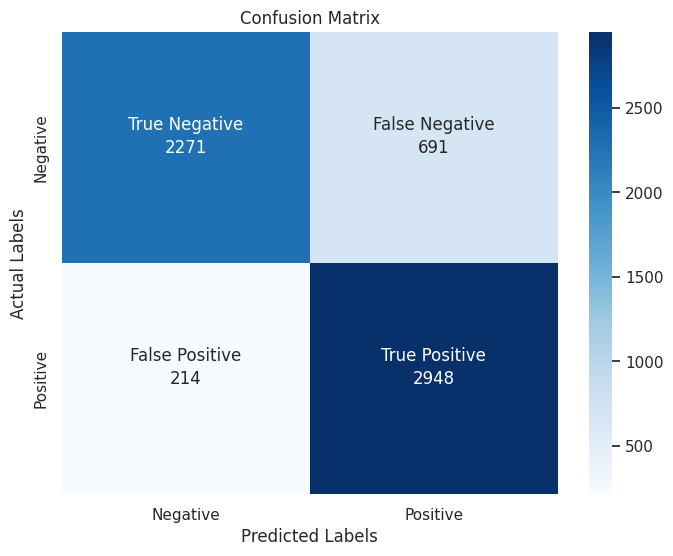

In [ ]:
from sklearn.naive_bayes import MultinomialNB
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
tfidf_vectorizer = TfidfVectorizer(max_features=22000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)
print("\n")
print("Naive Bayes (TF-IDF)\n")
performance_eval(nb_classifier, X_test_tfidf, y_test)
